# EDA For DA Project
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read Dataset

In [3]:
import pickle
pickle_in = open("CleanedDataAnalyst.pickle", "rb")
df = pickle.load(pickle_in)

In [9]:
df[["Job Title", "New Job Title", "Job Position"]].head(20)

,Job Title,New Job Title,Job Position
0,"Data Analyst, Center on Immigration and Justic...",Migration Data Analyst,Clerk
1,Quality Data Analyst,Product Quality Data Analyst,Clerk
2,"Senior Data Analyst, Insights & Analytics Team...",Service & Operations Data Analyst,Senior
3,Data Analyst,Data Analyst,Clerk
4,Reporting Data Analyst,Data Analyst,Reporter
5,Data Analyst,Data Analyst,Clerk
6,Business/Data Analyst (FP&A),Business Intelligence Analyst,Clerk
7,Data Science Analyst,Data Analyst,Clerk
8,Data Analyst,Data Analyst,Clerk
9,"Data Analyst, Merchant Health",Health & Services Data Analyst,Clerk


# Data visualisation

### Sankey Diagram for contribution of Size to Ownership

In [167]:
import plotly.express as px
fig = px.parallel_categories(df,dimensions=['Size', 'Type of ownership'],color='Revenue',color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

### Most Freqent job title

Text(0.5, 1.0, 'Most frequent Job Titles')

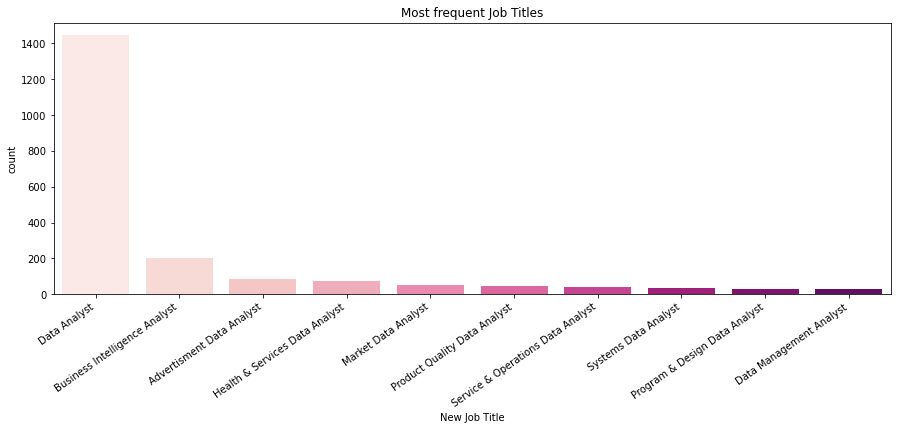

In [7]:
fig=plt.figure(figsize=(15,5))
chart=sns.countplot(x='New Job Title',data=df,order=pd.value_counts(df['New Job Title']).iloc[:10].index,palette='RdPu')
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
chart.set_title(label='Most frequent Job Titles',loc='center')
# plt.savefig("Most Frequent Job.png")

### Data Analyst Salaries Distribution

In [168]:
datanalyst=df[df['Job Title']=='Data Analyst']
fig=px.histogram(datanalyst,x='Salary Estimate',marginal='box',title='Distribution of Data Analyst Salary Estimate', width=1024, height=800)
fig.show()

### Salary distribution of entire dataset

In [169]:
fig=px.histogram(df,x='Salary Estimate',marginal='box',title='Distribution of Salary Estimate', width=1024, height=800,
                color_discrete_sequence=px.colors.diverging.Spectral)
fig.show()

### Scatterplot Matrix for Numerical Data 

In [170]:
fig = px.scatter_matrix(df,dimensions=['Salary Estimate','Rating','Revenue','Size'],
                        title='Scatter plot of Salary Estimate, Rating, Revenue and Size',width=960, height=1000,
                       color_discrete_sequence=px.colors.sequential.Blues_r)
fig.update_traces(diagonal_visible=False, showlowerhalf=False)

fig.show()

### Bar chart
#### Location of Headquarters

<AxesSubplot:xlabel='Headquarters', ylabel='count'>

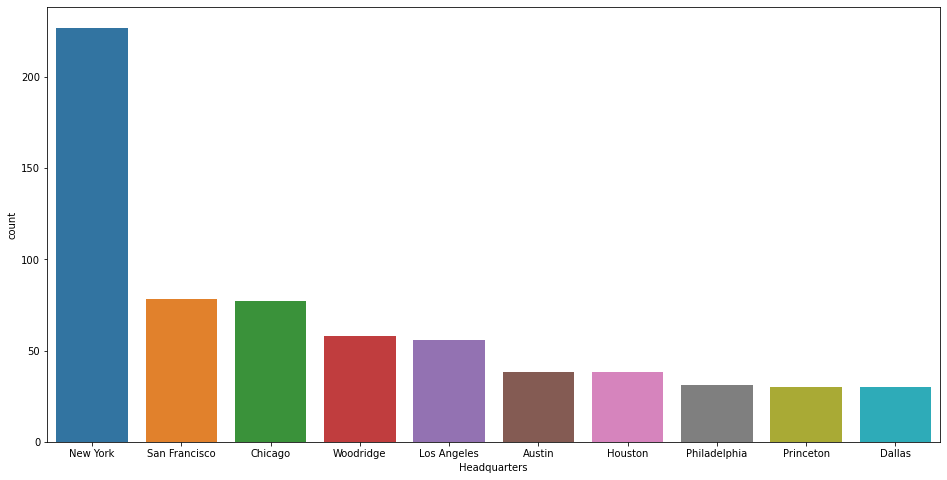

In [12]:
fig = plt.figure(figsize=(16,8))
qualitative_colors = sns.color_palette("Set2_r", 5)
sns.countplot(x='Headquarters',data=df,order=pd.value_counts(df['Headquarters']).iloc[:10].index)

### Sunburst on Location and their Headquarters

In [12]:
fig = px.sunburst(df, path=['Location', 'Headquarters'], values='Salary Estimate', width=1024, height=800)
fig.update_traces(textinfo='label+percent entry')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

In [68]:
x = pd.DataFrame(df.groupby('Industry').sum()['Salary Estimate'])
x = x[x['Salary Estimate'] > 9.180000e+05]
x = x.reset_index()
x.describe()

,Salary Estimate
count,2.200000e+01
mean,6.532705e+06
std,1.071172e+07
min,9.270000e+05
25%,1.400375e+06
50%,3.144750e+06
75%,5.296125e+06
max,4.877550e+07


### Salary Estimate based on Industry

In [120]:
fig = px.pie(x, values='Salary Estimate', names='Industry', title='Salary Estimate of top 75% of Industry', 
             width=1024, height=900, hole=.3, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_traces(textinfo='percent')
fig.show()

### Top 10 companies offering jobs in the IT Services

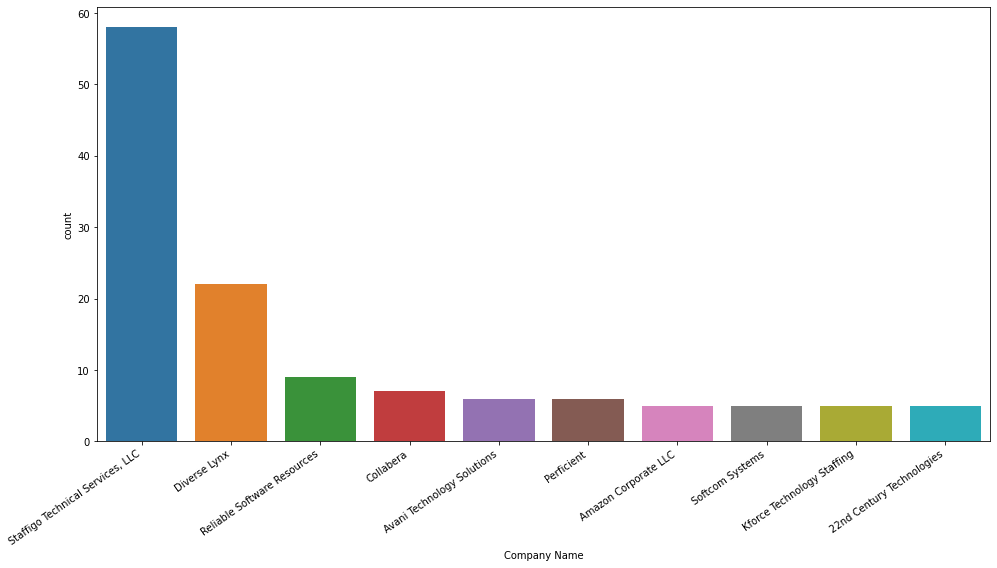

In [15]:
df_sub=df[df['Industry']=='IT Services']
fig = plt.figure(figsize=(16,8))
qualitative_colors = sns.color_palette("pastel", 5)
chart=sns.countplot(x='Company Name',data=df_sub,order=pd.value_counts(df_sub['Company Name']).iloc[:10].index)
y=chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')

### Salary Estimate based on Size of company

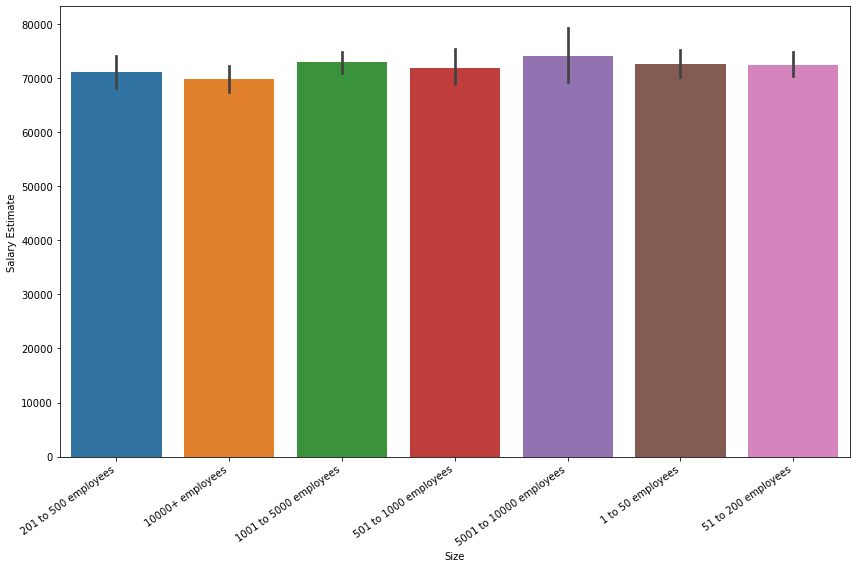

In [16]:
fig=plt.figure(figsize=(12,8))
chart=sns.barplot(data=df,x='Size',y='Salary Estimate')
chart.set_xticklabels(chart.get_xticklabels(), rotation=35, horizontalalignment='right')
plt.tight_layout()

### Sunburst Chart based on Size and Revenue Splitup

In [21]:
df["Revenue Millions"] = df["Revenue"].apply(lambda x : str(int(x/1000000)) + " Million")

In [24]:

fig1 = px.sunburst(
        data_frame=df,
        path=["Size", "Revenue Millions"],
        color="Size",
        color_continuous_scale=px.colors.sequential.BuGn,
        maxdepth=2,
        branchvalues="remainder")
fig1.update_traces(textinfo='label+percent parent')
fig1.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig1.show()